In [25]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [16]:
x_train.shape

(50000, 32, 32, 3)

### Limpieza


In [17]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [18]:
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

### Normalizar

In [19]:
mean = np.mean(x_train)
std = np.std(x_train)

In [20]:
x_train = (x_train - mean) / (std + 1e-7)
x_test = (x_test - mean) / (std + 1e-7)

In [21]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

print('x_train shape:', x_train.shape)
print('train:', x_train.shape[0])
print('validation:', x_valid.shape[0])
print('test:', x_test.shape[0])

x_train shape: (45000, 32, 32, 3)
train: 45000
validation: 5000
test: 10000


In [22]:
base_filters = 32
w_reg = regularizers.l2(1e-4)

In [23]:
model = Sequential()
# first layer
model.add(Conv2D(base_filters,(3,3), padding='same', kernel_regularizer=w_reg, activation='relu', input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
# second layer
model.add(Conv2D(base_filters, (3,3), padding='same', kernel_regularizer=w_reg, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# third layer
model.add(Conv2D(base_filters*2, (3,3), padding='same', kernel_regularizer=w_reg, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# fourth layer
model.add(Conv2D(base_filters*2, (3,3), padding='same', kernel_regularizer=w_reg, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
# five layer
model.add(Conv2D(base_filters*4, (3,3), padding='same', kernel_regularizer=w_reg, activation='relu'))
model.add(BatchNormalization())
# six layer
model.add(Conv2D(base_filters*4, (3,3), padding='same', kernel_regularizer=w_reg, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
# flatten - classifier
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 309,290 (1.18 MB)

 Trainable params: 308,394 (1.18 MB)

 Non-trainable params: 896 (3.50 KB)

In [26]:
datagen = ImageDataGenerator(
    rotation_range=15, 
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    horizontal_flip=True,
    vertical_flip=False
    )

In [33]:
checkpoint = ModelCheckpoint('model.keras', verbose=1, save_best_only=True, monitor='val_accuracy')

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#hist = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_valid, y_valid), verbose=2, shuffle=True)

In [35]:
hist = model.fit(
    datagen.flow(x_train, y_train, batch_size=32), 
    callbacks=[checkpoint], 
    steps_per_epoch=x_train.shape[0]//128, 
    epochs=100, 
    verbose=2, 
    validation_data=(x_valid, y_valid)
    )

Epoch 1/100


e:\Programacion\IA\CNN\tf_gpu_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from -inf to 0.32160, saving model to model.keras
351/351 - 28s - 80ms/step - accuracy: 0.3009 - loss: 2.5745 - val_accuracy: 0.3216 - val_loss: 2.0391
Epoch 2/100

Epoch 2: val_accuracy improved from 0.32160 to 0.45640, saving model to model.keras
351/351 - 23s - 64ms/step - accuracy: 0.3864 - loss: 1.9691 - val_accuracy: 0.4564 - val_loss: 1.6618
Epoch 3/100

Epoch 3: val_accuracy improved from 0.45640 to 0.48540, saving model to model.keras
351/351 - 23s - 64ms/step - accuracy: 0.4313 - loss: 1.8157 - val_accuracy: 0.4854 - val_loss: 1.6069
Epoch 4/100

Epoch 4: val_accuracy improved from 0.48540 to 0.52580, saving model to model.keras
351/351 - 23s - 65ms/step - accuracy: 0.4609 - loss: 1.6539 - val_accuracy: 0.5258 - val_loss: 1.5383
Epoch 5/100


C:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 5: val_accuracy improved from 0.52580 to 0.53900, saving model to model.keras
351/351 - 2s - 6ms/step - accuracy: 0.4479 - loss: 1.8234 - val_accuracy: 0.5390 - val_loss: 1.4447
Epoch 6/100

Epoch 6: val_accuracy improved from 0.53900 to 0.57040, saving model to model.keras
351/351 - 23s - 64ms/step - accuracy: 0.5040 - loss: 1.5220 - val_accuracy: 0.5704 - val_loss: 1.3218
Epoch 7/100

Epoch 7: val_accuracy improved from 0.57040 to 0.58340, saving model to model.keras
351/351 - 23s - 65ms/step - accuracy: 0.5400 - loss: 1.3996 - val_accuracy: 0.5834 - val_loss: 1.3098
Epoch 8/100

Epoch 8: val_accuracy improved from 0.58340 to 0.60040, saving model to model.keras
351/351 - 23s - 65ms/step - accuracy: 0.5608 - loss: 1.3394 - val_accuracy: 0.6004 - val_loss: 1.2512
Epoch 9/100

Epoch 9: val_accuracy did not improve from 0.60040
351/351 - 23s - 64ms/step - accuracy: 0.5802 - loss: 1.2715 - val_accuracy: 0.5878 - val_loss: 1.3393
Epoch 10/100

Epoch 10: val_accuracy did not improve

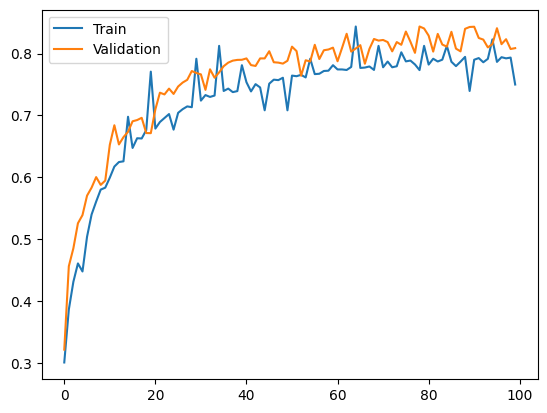

In [37]:
plt.plot(hist.history['accuracy'], label='Train')
plt.plot(hist.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

In [38]:
model.load_weights('model.keras')

In [39]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8188 - loss: 0.7057


[0.7059494853019714, 0.8205000162124634]